In [1]:
# Library imports / set up
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# display is required to allow multiple prints in each cell
from IPython.display import display
import numpy as np

In [2]:
# Data is read
dc = pd.read_csv('david_cameron_tweets.csv')
tm = pd.read_csv('theresa_may_tweets.csv')
lv = pd.read_csv('campaignforleo_tweets.csv')

# Print out first line to make sure data is read ok
display(dc.head(1))
display(tm.head(1))
display(lv.head(1))

# Print rows x columns so we're sure it's ok
display("DC " + str(dc.shape) + ", TM " + str(tm.shape) + ", LV " + str(lv.shape))

,id,created_at,text
0,976807128877928448,2018-03-22 13:05:42,People wrongly believe that dementia is an ine...


,id,created_at,text
0,979752503309946882,2018-03-30 16:09:34,"RT @10DowningStreet: ""I wish you all a very ha..."


,id,created_at,text
0,980032266616393728,2018-03-31 10:41:15,C’mon Munster. Looking forward to a good day i...


'DC (2648, 3), TM (733, 3), LV (3233, 3)'

In [3]:
# created_at is likely to be parsed as text
# We convert dates to a date/time format so we can do 'maths' on them
dc['created_at'] = pd.to_datetime(dc['created_at'], format='%Y-%m-%d %H:%M:%S')
tm['created_at'] = pd.to_datetime(tm['created_at'], format='%Y-%m-%d %H:%M:%S')
lv['created_at'] = pd.to_datetime(lv['created_at'], format='%Y-%m-%d %H:%M:%S')
# If ok, dtype should be datetime64[ns] or <M8[ns]
dc.created_at.dtype
#tm.created_at.dtype
#lv.created_at.dtype

dtype('<M8[ns]')

# Statistics

In [4]:
# Add year/week
dc['YearWeek'] = dc['created_at'].apply(lambda x: "%d/%d" % (x.year, x.week))
tm['YearWeek'] = tm['created_at'].apply(lambda x: "%d/%d" % (x.year, x.week))
lv['YearWeek'] = lv['created_at'].apply(lambda x: "%d/%d" % (x.year, x.week))

In [5]:
# Aggregate tweet counts per week
# (TODO there are probably better, and more pythonesque, ways of doing this)
dc_week = dc.groupby(['YearWeek'])
x = dc_week.aggregate(np.count_nonzero)
x = x.reset_index(level=['YearWeek'])
dc_week = x[['YearWeek', 'id']].copy()
dc_week.columns = ['YearWeek', 'Count']

tm_week = tm.groupby(['YearWeek'])
x = tm_week.aggregate(np.count_nonzero)
x = x.reset_index(level=['YearWeek'])
tm_week = x[['YearWeek', 'id']].copy()
tm_week.columns = ['YearWeek', 'Count']

lv_week = lv.groupby(['YearWeek'])
x = lv_week.aggregate(np.count_nonzero)
x = x.reset_index(level=['YearWeek'])
lv_week = x[['YearWeek', 'id']].copy()
lv_week.columns = ['YearWeek', 'Count']

# Make sure it worked
display(dc_week.head(3))
display(tm_week.head(3))
display(lv_week.head(3))


,YearWeek,Count
0,2012/40,4
1,2012/41,8
2,2012/42,4


,YearWeek,Count
0,2016/26,45
1,2016/27,94
2,2016/28,16


,YearWeek,Count
0,2015/13,5
1,2015/14,13
2,2015/15,10


In [6]:
# Let's put the values for DC, TM, and LV, together in a single data frame, for simplicity
df = pd.DataFrame(columns=["YearWeek","DC", "TM", "LV"])

i = 0
for year in range (2012, 2018):
    for week in range (1, 52):
        mydate = str(year) + "/" + str(week)
        
        DC = 0
        try:
            DC = dc_week.loc[dc_week['YearWeek'] == mydate].iloc[0]['Count']
        except:
            DC = 0
            
        TM = 0
        try:
            TM = tm_week.loc[tm_week['YearWeek'] == mydate].iloc[0]['Count']
        except:
            TM = 0
            
        LV = 0
        try:
            LV = lv_week.loc[lv_week['YearWeek'] == mydate].iloc[0]['Count']
        except:
            LV = 0
            
        df.loc[i] = [ mydate, int(DC), int(TM), int(LV) ]
        # df[i]['YearWeek'] = mydate
        i = i + 1
        
#df = df.set_index('YearWeek')


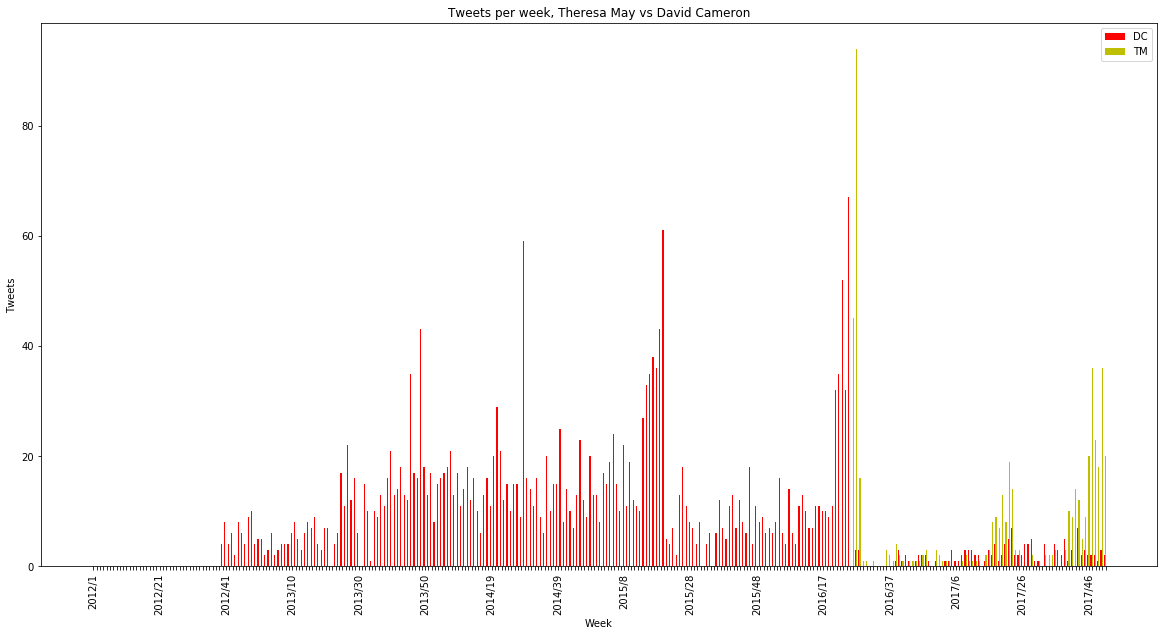

In [7]:
# Plot (DC vs TM)

fig, ax = plt.subplots(figsize=(20, 10))  
index = np.arange(len(df)) # the x locations for the groups
width = 0.35         # the width of the bars

p1 = ax.bar(index, df['DC'], width, color='r')
p2 = ax.bar(index + width, df['TM'], width, color='y')

ax.set_title('Tweets per week, Theresa May vs David Cameron')

# set axis ticks, and make visible only 1 every 20
ax.set_xticks(index + width )
ax.set_xticklabels(df['YearWeek'])
plt.xticks(fontsize=10, rotation='vertical')
for label in ax.get_xticklabels():
    label.set_visible(False)
for label in ax.get_xticklabels()[::20]:
    label.set_visible(True)

# Print legend and labels
ax.legend((p1[0], p2[0]), ('DC', 'TM'))
ax.set_ylabel('Tweets')
ax.set_xlabel('Week')

ax.autoscale_view()

plt.show()

# Content analysis of tweets

In [8]:
# Just to have the sample dataframe here for comparison
dc.head(5)

,id,created_at,text,YearWeek
0,976807128877928448,2018-03-22 13:05:42,People wrongly believe that dementia is an ine...,2018/12
1,976413836268982272,2018-03-21 11:02:54,Pleasure speaking today at Woodford County Hig...,2018/12
2,976097731411406848,2018-03-20 14:06:48,Another record-breaking year for Alzheimer's R...,2018/12
3,973655173569576960,2018-03-13 20:20:57,Just given evidence to the US Senate Foreign R...,2018/11
4,971334094968770560,2018-03-07 10:37:49,I first met Jo in Sudan where she was helping ...,2018/10


In [13]:
# Here we define dh
words_energy = ['believe', 'belief', 'action', 'do', 
                'take', 'fast', 'quick', 'as soon as possible', 'law', 'legislate', 
                'respond', 'right', 'wrong']

words_friendliness = ['sympathy', 'concern', 'condolences', 'support', 'understand', 
                      'help', 'assist', 'disaster', 'tragedy']

In [144]:
# Word search -> calculate the two indices per week
import re
import string

def indices(df, textColumn, weekColumn):
    
    
    output  = []
    
    # navigate one row at a time
    for index, row in df.iterrows():

        
        
        # week will be used to index
        week = row[weekColumn]
        
        weekTotalWords = 0
        weekEnergyCount = 0
        weekFriendlinessCount = 0        
    
        # process text to make it searchable (add spaces, replace punctuation)
        text = " " + row[textColumn].lower() + " "
        translator = str.maketrans('','',string.punctuation)
        text = text.translate(translator)
        weekTotalWords = sum([1 for i in text.split()])

            
        # search words in string
        for search_word in words_energy:
            my_regex = r" " + re.escape(search_word) + r" "
            occurrences = len(re.findall(my_regex, text))
            weekEnergyCount= weekEnergyCount + occurrences

        
        for search_word in words_friendliness:
            my_regex = r" " + re.escape(search_word) + r" "
            occurrences = len(re.findall(my_regex, text))
            weekFriendlinessCount = weekFriendlinessCount + occurrences
        
        # Set output
        out = dict()
        out['YearWeek'] = week
        out['weekEnergy'] = weekEnergyCount*100/weekTotalWords
        out['weekFriendliness'] = weekFriendlinessCount*100/weekTotalWords
        output.append(out)
    
    return pd.DataFrame(output)

In [147]:
# Aggregate by week
dcaggr = dc.groupby(['YearWeek'])['text'].apply(lambda x: ' '.join(x)).reset_index(['YearWeek', 'text'])
tmaggr = tm.groupby(['YearWeek'])['text'].apply(lambda x: ' '.join(x)).reset_index(['YearWeek', 'text'])

# if you need to compare to compare:
# dfme['2012/40'] vs dc[dc['YearWeek']=='2012/40']

In [151]:
# David Cameron indices
dci = indices(dcaggr, 'text', 'YearWeek')
dci.head()

,YearWeek,weekEnergy,weekFriendliness
0,2012/40,2.352941,1.176471
1,2012/41,1.863354,0.000000
2,2012/42,1.333333,0.000000
3,2012/43,1.666667,0.000000
4,2012/44,0.000000,0.000000


In [152]:
# Theresa May indices
tmi = indices(tmaggr, 'text', 'YearWeek')
tmi.head()

,YearWeek,weekEnergy,weekFriendliness
0,2016/26,0.727273,0.606061
1,2016/27,0.427122,0.480513
2,2016/28,0.324675,0.000000
3,2016/29,0.000000,0.000000
4,2016/30,0.000000,0.000000


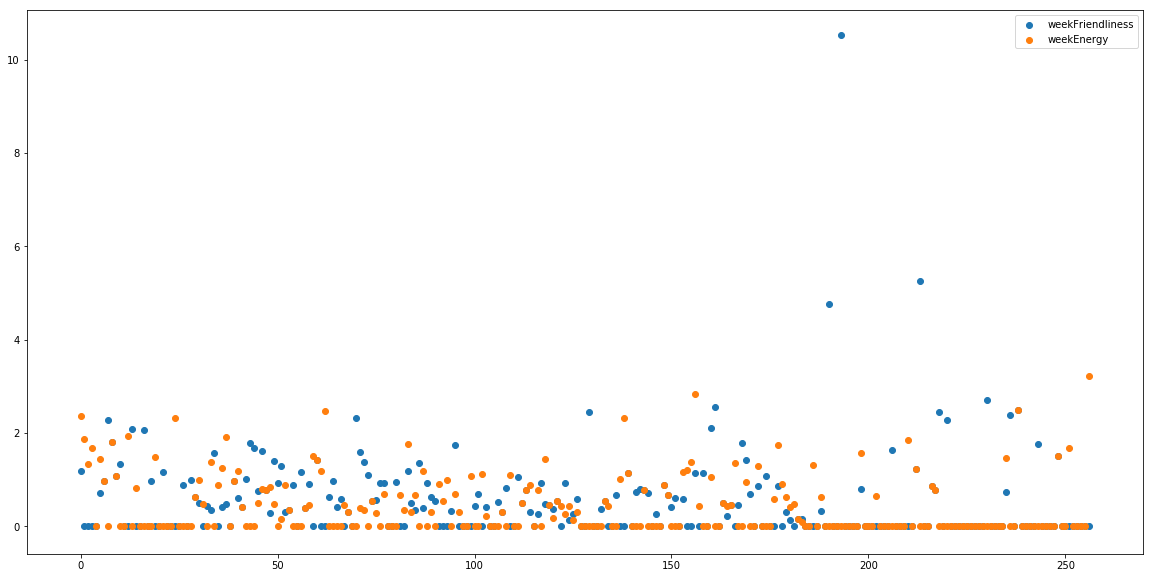

In [167]:
# Plot David Cameron
plt.figure()
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(dci.index, dci['weekFriendliness'])
ax.scatter(dci.index, dci['weekEnergy'])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

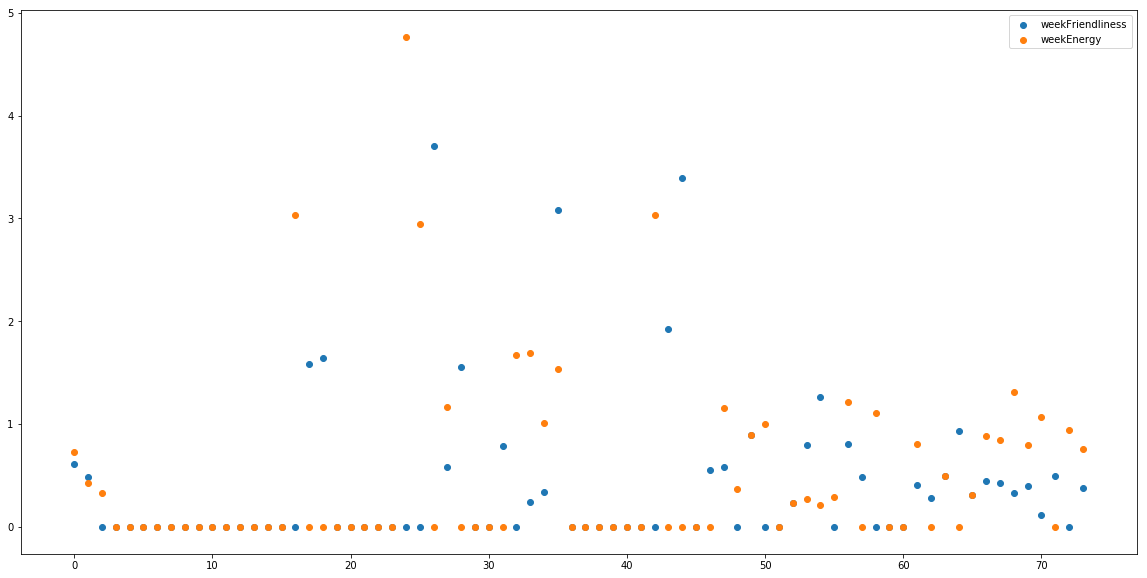

In [169]:
# Plot Theresa May
plt.figure()
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(tmi.index, tmi['weekFriendliness'])
ax.scatter(tmi.index, tmi['weekEnergy'])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)